In [1]:
%pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
import torch
import torch.nn as nn

# Определяем девайс CPU или GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется: {device}")

# Определение сверточного автоэнкодера (CAE)
class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()

        # Энкодер
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(2, stride=2, padding=0),

            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2, padding=0),

            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2, padding=1),
        )

        # Декодер
        self.decoder = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),

            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),

            nn.Conv2d(8, 16, kernel_size=3),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),

            nn.Conv2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели
model = CAE().to(device)

Используется: cpu


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Параметры модели
batch_size = 256
epochs = 50
learning_rate = 1e-3

# Преобразователь датасета
transform = transforms.ToTensor()

# Подгружаем MNIST обучающую и тестовую выборки
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Инициализация критерия и оптимизатора
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Обучение
def train():
  model.train()

  train_loss = 0

  for data, _ in train_loader:
      data = data.to(device)
      output = model(data)
      loss = criterion(output, data)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss += loss.item()

  print(f"Эпоха {epoch + 1}/{epochs}, Потеря: {train_loss / len(train_loader):.4f}")

# Обучение модели
for epoch in range(epochs):
    train()

# Сохранение модели в файл
torch.save(model.state_dict(), './model/mnist_model.pth')

Используется: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 40.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.15MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.13MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.24MB/s]


Эпоха 1/50, Потеря: 0.2973
Эпоха 2/50, Потеря: 0.1653
Эпоха 3/50, Потеря: 0.1479
Эпоха 4/50, Потеря: 0.1379
Эпоха 5/50, Потеря: 0.1314
Эпоха 6/50, Потеря: 0.1267
Эпоха 7/50, Потеря: 0.1230
Эпоха 8/50, Потеря: 0.1205
Эпоха 9/50, Потеря: 0.1182
Эпоха 10/50, Потеря: 0.1164
Эпоха 11/50, Потеря: 0.1152
Эпоха 12/50, Потеря: 0.1138
Эпоха 13/50, Потеря: 0.1127
Эпоха 14/50, Потеря: 0.1115
Эпоха 15/50, Потеря: 0.1106
Эпоха 16/50, Потеря: 0.1097
Эпоха 17/50, Потеря: 0.1090
Эпоха 18/50, Потеря: 0.1080
Эпоха 19/50, Потеря: 0.1074
Эпоха 20/50, Потеря: 0.1067
Эпоха 21/50, Потеря: 0.1062
Эпоха 22/50, Потеря: 0.1056
Эпоха 23/50, Потеря: 0.1050
Эпоха 24/50, Потеря: 0.1045
Эпоха 25/50, Потеря: 0.1042
Эпоха 26/50, Потеря: 0.1037
Эпоха 27/50, Потеря: 0.1033
Эпоха 28/50, Потеря: 0.1029
Эпоха 29/50, Потеря: 0.1026
Эпоха 30/50, Потеря: 0.1023
Эпоха 31/50, Потеря: 0.1020
Эпоха 32/50, Потеря: 0.1017
Эпоха 33/50, Потеря: 0.1014
Эпоха 34/50, Потеря: 0.1012
Эпоха 35/50, Потеря: 0.1010
Эпоха 36/50, Потеря: 0.1006
Э

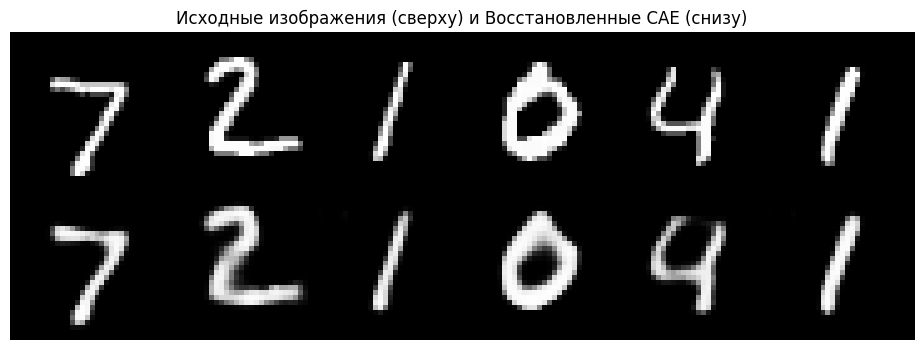

In [6]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Загрузка натреннированой модели из файла
model.load_state_dict(torch.load('./model/mnist_model.pth'))

# Восстановление изображений из тестового набора
def visualize_reconstructions():
    model.eval()

    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data.to(device)
        recon = model(data)

        # Выбираем первые 6 изображений
        n = 6
        comparison = torch.cat([data[:n],
                                recon.view(batch_size, 1, 28, 28)[:n]])
        grid_img = torchvision.utils.make_grid(comparison, nrow=n)

        plt.figure(figsize=(16,4))
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        plt.title("Исходные изображения (сверху) и Восстановленные CAE (снизу)")
        plt.axis('off')
        plt.show()

visualize_reconstructions()